#Agua potable

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## Librerias y configuraciones previas


In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#Creacion de los modelos
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import CategoricalNB, ComplementNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


import math
from sklearn import metrics

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#SVC
#==============================================================================

from scipy.stats import pearsonr
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


import statsmodels.api as sm
import math

from sklearn.svm import LinearSVC

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


## Carga del dataset

In [ ]:
## Cargar datos con colab
## =============================================================================

from google.colab import drive 
import os

drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
os.chdir("/gdrive/MyDrive/Especialización/8 Modelos Cuantitativos Analitica/202107_ModelosCuantitativosPython/Datasets/Taller")
!ls

water_potability.csv  wine.csv


In [ ]:
d=pd.read_csv('./water_potability.csv')

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


 ## Limpieza de datos (Data Cleaning) y preparación

In [ ]:
d.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
d["Potability"].replace(1,'Good',inplace=True)
d["Potability"].replace(0,'Bad',inplace=True)

In [ ]:
#d['loan_amount'] = pd.to_numeric(d['loan_amount'])

In [ ]:
#Checking for duplicates
d.loc[d.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [ ]:
d.replace('?',np.nan, inplace=True)

In [ ]:
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

ph 491
Hardness 0
Solids 0
Chloramines 0
Sulfate 781
Conductivity 0
Organic_carbon 0
Trihalomethanes 162
Turbidity 0
Potability 0


In [ ]:
#d['ph'].fillna(d['ph'].mean(), inplace=True)
#d['Sulfate'].fillna(d['Sulfate'].mean(), inplace=True)
#d['Trihalomethanes'].fillna(d['Trihalomethanes'].mean(), inplace=True)

d.dropna(subset = ['ph'], inplace= True)
d.dropna(subset = ['Sulfate'], inplace= True)
d.dropna(subset = ['Trihalomethanes'], inplace= True)

for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

ph 0
Hardness 0
Solids 0
Chloramines 0
Sulfate 0
Conductivity 0
Organic_carbon 0
Trihalomethanes 0
Turbidity 0
Potability 0


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   object 
dtypes: float64(9), object(1)
memory usage: 172.8+ KB


In [ ]:
corr_matrix = d.corr(method='pearson')
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000


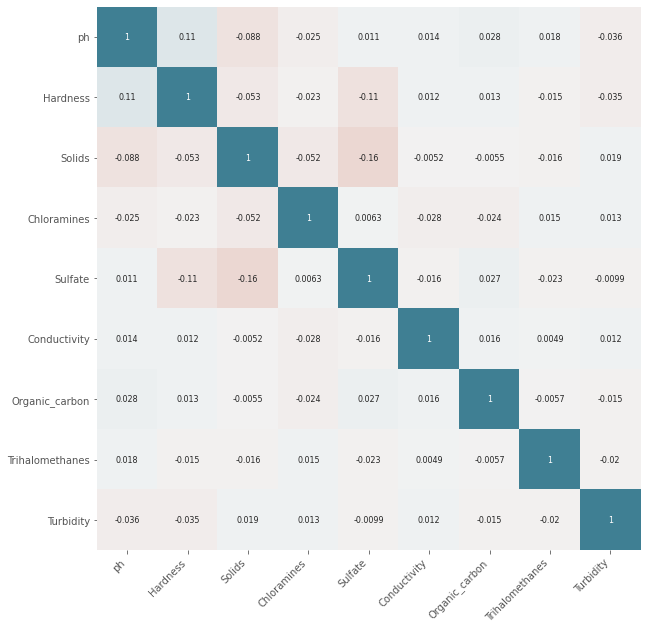

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## Visualización de datos

In [ ]:
d.groupby('Potability').Potability.count().sort_values(ascending=False)

Potability
Bad     1200
Good     811
Name: Potability, dtype: int64

## Dividir el conjunto de datos
### En este caso, el 80% de los datos se utilizarán para entrenar el modelo.

In [ ]:
vDep = list(d.columns)
vDep.remove('Potability')
print(vDep)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
# División de los datos en train y test
# ==============================================================================

X = d[vDep]
y = d['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
d[vDep].head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [ ]:
#Escalar Variables

scaler = MinMaxScaler()
num_vars = vDep
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
765,0.533870,0.547578,0.345114,0.619040,0.439250,0.284979,0.767056,0.478196,0.430081
2881,0.335131,0.493410,0.561742,0.585857,0.488747,0.416615,0.386032,0.409273,0.473507
219,0.606124,0.637408,0.502705,0.337071,0.570945,0.495091,0.503250,0.381223,0.506862
1229,0.498161,0.425438,0.275130,0.470910,0.322126,0.362498,0.366260,0.430236,0.447589
489,0.359863,0.456393,0.307097,0.336730,0.528049,0.376746,0.523892,0.202428,0.360512


## Creación del modelo

In [ ]:
modelSVC       = svm.SVC(kernel='linear').fit(X_train, y_train)
modelLR        = LogisticRegression(random_state=0).fit(X_train, y_train)
modelknn       = neighbors.KNeighborsClassifier(n_neighbors = 31).fit(X_train, y_train)
modelComplNB   = ComplementNB().fit(X_train, y_train)
modelTreeClas  = tree.DecisionTreeClassifier().fit(X_train, y_train)
modelRanForest = RandomForestClassifier(n_estimators=47, max_depth=8, random_state=0).fit(X_train, y_train)
ModelNN1       = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=1).fit(X_train, y_train)
ModelNN2       = MLPClassifier(hidden_layer_sizes=(15,), random_state=1, max_iter=1, warm_start=True).fit(X_train, y_train)

## Evaluación del modelo

###Exactitud (accuracy)

In [ ]:
y_SVC      = modelSVC.predict(X_test)
y_LR       = modelLR.predict(X_test)
y_knn      = modelknn.predict(X_test)
y_ComplNB  = modelComplNB.predict(X_test)
y_TreeClas = modelTreeClas.predict(X_test)
y_RanForest= modelRanForest.predict(X_test)
y_NN1      = ModelNN1.predict(X_test)
y_NN2      = ModelNN2.predict(X_test)

In [ ]:
print("modelSVC      :",metrics.accuracy_score(y_test, y_SVC      ))
print("modelLR       :",metrics.accuracy_score(y_test, y_LR       ))
print("modelknn      :",metrics.accuracy_score(y_test, y_knn      ))
print("modelComplNB  :",metrics.accuracy_score(y_test, y_ComplNB  ))
print("modelTreeClas :",metrics.accuracy_score(y_test, y_TreeClas ))
print("modelRanForest:",metrics.accuracy_score(y_test, y_RanForest))
print("ModelNN1      :",metrics.accuracy_score(y_test, y_NN1      ))
print("ModelNN2      :",metrics.accuracy_score(y_test, y_NN2      ))

modelSVC      : 0.5732009925558312
modelLR       : 0.5732009925558312
modelknn      : 0.5806451612903226
modelComplNB  : 0.543424317617866
modelTreeClas : 0.5533498759305211
modelRanForest: 0.6029776674937966
ModelNN1      : 0.6129032258064516
ModelNN2      : 0.575682382133995


### Matriz de confusión

[[224   7]
 [149  23]]


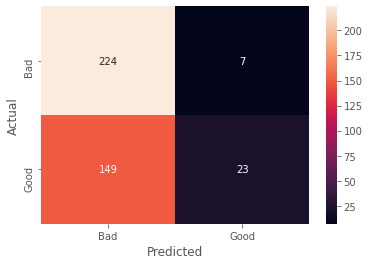

              precision    recall  f1-score   support

         Bad       0.60      0.97      0.74       231
        Good       0.77      0.13      0.23       172

    accuracy                           0.61       403
   macro avg       0.68      0.55      0.48       403
weighted avg       0.67      0.61      0.52       403



In [ ]:
#y_SVC
#y_LR
#y_knn
#y_ComplNB
#y_TreeClas
#y_RanForest
#y_NN1
#y_NN2

y_pred = y_NN1

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d'
            ,xticklabels=d['Potability'].sort_values().unique(), yticklabels=d['Potability'].sort_values().unique()
           )

plt.ylabel('Actual')
plt.xlabel('Predicted')
print(conf_mat)

plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=d['Potability'].sort_values().unique()))

### Receiver Operating Characteristic (ROC)

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
#Convertir y_test bad y good en 0 y 1

e_dataframe = pd.DataFrame(y_test)
e_dataframe.replace('Bad',0, inplace=True)
e_dataframe.replace('Good', 1,inplace=True)
arr = e_dataframe.to_numpy()

AUC: 0.47


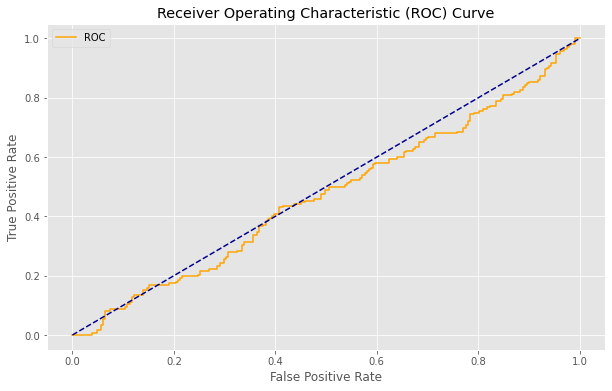

In [ ]:
fig = plt.figure(figsize=(10,6))


probs = modelLR.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(arr, probs*(-1))

print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(arr, probs*(-1))
plot_roc_curve(fpr, tpr)

## Validación Cruzada (Cross validation)

In [ ]:
X = d[vDep]
y = d['Potability']

#scaler = MinMaxScaler()
#num_vars = numCols

X_Completo = X
y_Completo = y

X_Completo[num_vars] = scaler.fit_transform(X_Completo[num_vars])

In [ ]:
CV = 10
scoring = 'accuracy'

models = []
models.append(('modelSVC',modelSVC))
models.append(('modelLR',modelLR))
models.append(('modelknn',modelknn))
models.append(('modelComplNB',modelComplNB))
models.append(('modelTreeClas',modelTreeClas))
models.append(('modelRanForest',modelRanForest))
models.append(('modelNN1',ModelNN1))
models.append(('modelNN2',ModelNN2))


cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for name, model in models:
    #model_name = model.__class__.__name__
    model_name = name
    accuracies = cross_val_score(model, X_Completo, y_Completo, cv=CV, scoring=scoring)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
# modelSVC      
# modelLR       
# modelknn      
# modelComplNB  
# modelTreeClas 
# modelRanForest
# modelNN1      
# modelNN2      

cv_df[cv_df['model_name'] == 'modelNN2']

,model_name,fold_idx,accuracy
70,modelNN2,0,0.609756
71,modelNN2,1,0.609756
72,modelNN2,2,0.609756
73,modelNN2,3,0.609756
74,modelNN2,4,0.609756
75,modelNN2,5,0.609756
76,modelNN2,6,0.611621
77,modelNN2,7,0.611621
78,modelNN2,8,0.608563
79,modelNN2,9,0.608563


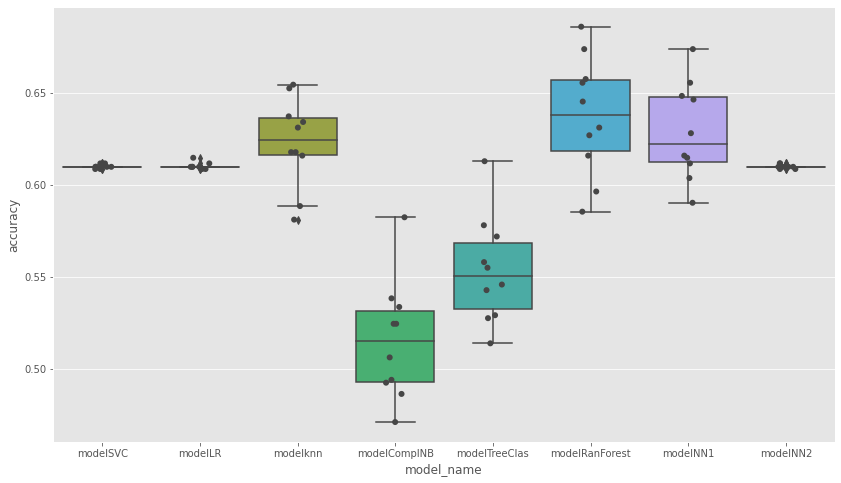

In [ ]:
# Gráfica de accuracy de los modelos

fig = plt.figure(figsize=(14,8))

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=3, jitter=True, edgecolor="gray", linewidth=3)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending=False)

model_name
modelRanForest    0.637355
modelNN1          0.628800
modelknn          0.623009
modelLR           0.610196
modelSVC          0.609890
modelNN2          0.609890
modelTreeClas     0.553412
modelComplNB      0.515240
Name: accuracy, dtype: float64

In [ ]:
cv_df.groupby('model_name').accuracy.std().sort_values(ascending=True)

model_name
modelNN2          0.001034
modelSVC          0.001034
modelLR           0.001783
modelknn          0.024288
modelNN1          0.026263
modelTreeClas     0.028884
modelComplNB      0.032310
modelRanForest    0.032462
Name: accuracy, dtype: float64

##Afinando el modelo (tuning)

###Lineal e hiperparámetro C (con validación cruzada - Cross validation)

Identificacion del mejor hiperparametro C

In [ ]:
# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10]} 


# las metricas sobre las se evaluará el modelo
metricas = ['roc_auc', 'accuracy']


# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svm.SVC(kernel='linear', random_state = 0)
                             , param_grid = grid_hiperparametros 
                             , cv = 10 #folds
                             , scoring = metricas
                             , refit='accuracy'
                             #, return_train_score = True
                             , n_jobs = -1)



# Aplicamos la busqueda
busqueda_grid.fit(X_Completo, y_Completo)

#busqueda_grid.cv_results_.keys()

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7,
                               10]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring=['roc_auc', 'accuracy'],
             verbose=0)

In [ ]:
# Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()

accuracy_medio_cv = busqueda_grid.cv_results_['mean_test_accuracy'].tolist()
accuracy_std_cv = busqueda_grid.cv_results_['std_test_accuracy'].tolist()

roc_medio_cv = busqueda_grid.cv_results_['mean_test_roc_auc'].tolist()
roc_std_cv = busqueda_grid.cv_results_['std_test_roc_auc'].tolist()

In [ ]:
# Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv, 
                                 'mean_accuracy': accuracy_medio_cv,
                                 'std_accuracy': accuracy_std_cv})



print(df_resultados_cv)

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y grado óptimos:', busqueda_grid.best_params_)

         C  mean_accuracy  std_accuracy
0    0.001       0.596719      0.000887
1    0.010       0.596719      0.000887
2    0.100       0.596719      0.000887
3    0.300       0.596719      0.000887
4    0.500       0.596719      0.000887
5    1.000       0.596719      0.000887
6    2.000       0.596719      0.000887
7    3.000       0.596719      0.000887
8    4.000       0.596719      0.000887
9    5.000       0.596719      0.000887
10   7.000       0.596719      0.000887
11  10.000       0.596719      0.000887
Valor de coste y grado óptimos: {'C': 0.001}


Creación y entrenamiento del modelo

In [ ]:
# Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmL = svm.SVC(kernel='linear', 
                      C = busqueda_grid.best_params_.get('C'), #C=0.1
                      random_state = 0) # semilla

In [ ]:
CV = 10 #Folks:  Pliegues
scoring = 'accuracy' 


entries = []
accuracies = cross_val_score(modelo_svmL, X_Completo, y_Completo,cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_dfl = pd.DataFrame(entries, columns=['fold_idx', 'accuracy'])

In [ ]:
print(cv_dfl)
print('accuracy', cv_dfl.accuracy.mean())

   fold_idx  accuracy
0         0  0.594059
1         1  0.597015
2         2  0.597015
3         3  0.597015
4         4  0.597015
5         5  0.597015
6         6  0.597015
7         7  0.597015
8         8  0.597015
9         9  0.597015
accuracy 0.5967193734298804


## Polinómico e hiperparámetros: C y degree (con validación cruzada - Cross validation)

Identificación del mejor hiperparametro C y degree

In [ ]:
# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10],
                        'degree': [2, 3]} 

# Definimos las metricas sobre las que queremos evaluar
metricas = ['roc_auc', 'accuracy']

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svm.SVC(kernel='poly', random_state = 0), 
                             param_grid = grid_hiperparametros, 
                             cv = 10, #folds
                             scoring = metricas, 
                             refit = 'accuracy',
                             #return_train_score = True,
                             n_jobs = -1)


# Aplicamos la busqueda
busqueda_grid.fit(X_Completo, y_Completo)
#busqueda_grid.cv_results_.keys()

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7,
                               10],
                         'degree': [2, 3]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring=['roc_auc', 'accuracy'],
             verbose=0)

In [ ]:
# Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()
degree_cv = busqueda_grid.cv_results_['param_degree'].tolist()

accuracy_medio_cv = busqueda_grid.cv_results_['mean_test_accuracy'].tolist()
accuracy_std_cv = busqueda_grid.cv_results_['std_test_accuracy'].tolist()

In [ ]:
# Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv, 
                                 'degree': degree_cv, 
                                 'mean_accuracy': accuracy_medio_cv,
                                 'std_accuracy': accuracy_std_cv})
                                 
print(df_resultados_cv)

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y grado óptimos:', busqueda_grid.best_params_)

         C  degree  mean_accuracy  std_accuracy
0    0.001       2       0.596719      0.000887
1    0.001       3       0.605670      0.007974
2    0.010       2       0.597217      0.001819
3    0.010       3       0.651882      0.034591
4    0.100       2       0.632003      0.024642
5    0.100       3       0.661349      0.031076
6    0.300       2       0.650387      0.039303
7    0.300       3       0.663347      0.033423
8    0.500       2       0.658357      0.031597
9    0.500       3       0.658372      0.032547
10   1.000       2       0.665319      0.031110
11   1.000       3       0.660359      0.041989
12   2.000       2       0.664832      0.031514
13   2.000       3       0.657374      0.035232
14   3.000       2       0.663339      0.033267
15   3.000       3       0.652399      0.032781
16   4.000       2       0.664334      0.035228
17   4.000       3       0.653889      0.034254
18   5.000       2       0.666324      0.033505
19   5.000       3       0.650409      0

Creación y entrenamiento del modelo

In [ ]:
# Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmP = svm.SVC(kernel = 'poly', 
                      C = busqueda_grid.best_params_.get('C'), #C=3
                      degree = busqueda_grid.best_params_.get('degree'), #degree=2
                      random_state = 0) # semilla

In [ ]:
CV = 10 #Folks:  Pliegues
scoring = 'accuracy' 


entries = []
accuracies = cross_val_score(modelo_svmP, X_Completo, y_Completo, cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_dfP = pd.DataFrame(entries, columns=['fold_idx', 'accuracy'])

Evaluación del modelo

In [ ]:
print(cv_dfP)
print('accuracy', cv_dfP.accuracy.mean())

   fold_idx  accuracy
0         0  0.688119
1         1  0.606965
2         2  0.701493
3         3  0.681592
4         4  0.701493
5         5  0.621891
6         6  0.681592
7         7  0.631841
8         8  0.651741
9         9  0.696517
accuracy 0.666324318999064


Radial e hiperparámetros: C y gamma (con validación cruzada - Cross validation)

Identificación del mejor hiperparametro C y gamma

In [ ]:
# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10],
                        'gamma': [0.01, 0.1, 1, 5, 10]} 

# Definimos las metricas sobre las que queremos evaluar
metricas = ['roc_auc', 'accuracy']

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svm.SVC(kernel='rbf', random_state = 0), 
                             param_grid = grid_hiperparametros, 
                             cv = 10, #folds
                             scoring = metricas, 
                             refit = 'accuracy',
                             #return_train_score = True,
                             n_jobs = -1)


# Aplicamos la busqueda
busqueda_grid.fit(X_Completo, y_Completo,)
#busqueda_grid.cv_results_.keys()

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7,
                               10],
                         'gamma': [0.01, 0.1, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring=['roc_auc', 'accuracy'],
             verbose=0)

In [ ]:
# Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()
gamma_cv = busqueda_grid.cv_results_['param_gamma'].tolist()

accuracy_medio_cv = busqueda_grid.cv_results_['mean_test_accuracy'].tolist()
accuracy_std_cv = busqueda_grid.cv_results_['std_test_accuracy'].tolist()

In [ ]:
# Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv, 
                                 'gamma': gamma_cv, 
                                 'mean_accuracy': accuracy_medio_cv,
                                 'std_accuracy': accuracy_std_cv})
                                 
print(df_resultados_cv)

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y gamma óptimos:', busqueda_grid.best_params_)

         C  gamma  mean_accuracy  std_accuracy
0    0.001   0.01       0.596719      0.000887
1    0.001   0.10       0.596719      0.000887
2    0.001   1.00       0.596719      0.000887
3    0.001   5.00       0.596719      0.000887
4    0.001  10.00       0.596719      0.000887
5    0.010   0.01       0.596719      0.000887
6    0.010   0.10       0.596719      0.000887
7    0.010   1.00       0.596719      0.000887
8    0.010   5.00       0.596719      0.000887
9    0.010  10.00       0.596719      0.000887
10   0.100   0.01       0.596719      0.000887
11   0.100   0.10       0.596719      0.000887
12   0.100   1.00       0.596719      0.000887
13   0.100   5.00       0.596719      0.000887
14   0.100  10.00       0.596719      0.000887
15   0.300   0.01       0.596719      0.000887
16   0.300   0.10       0.596719      0.000887
17   0.300   1.00       0.597217      0.002874
18   0.300   5.00       0.641456      0.032433
19   0.300  10.00       0.636491      0.030391
20   0.500   

Creación y entrenamiento del modelo

In [ ]:
# Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmR = svm.SVC(kernel = 'rbf', 
                      C = busqueda_grid.best_params_.get('C'), #C=3
                      gamma = busqueda_grid.best_params_.get('gamma'), #gamma=0.1
                      random_state = 0) # semilla   

In [ ]:
CV = 10 #Folks:  Pliegues
scoring = 'accuracy' 


entries = []
accuracies = cross_val_score(modelo_svmR, X_Completo, y_Completo, cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_dfR = pd.DataFrame(entries, columns=['fold_idx', 'accuracy'])

Evaluación del modelo

In [ ]:
print(cv_dfR)
print('accuracy', cv_dfR.accuracy.mean())

   fold_idx  accuracy
0         0  0.658416
1         1  0.606965
2         2  0.711443
3         3  0.686567
4         4  0.696517
5         5  0.597015
6         6  0.661692
7         7  0.651741
8         8  0.641791
9         9  0.741294
accuracy 0.665344071720605


In [ ]:
print('Accuracy')
print('==================================================================')
print('Lineal                                  :', cv_df.accuracy.mean())
print('Lineal e hiperparámetro C               :', cv_dfl.accuracy.mean())
print('Polinómico e hiperparámetros: C y degree:', cv_dfP.accuracy.mean())
print('Radial e hiperparámetros: C y gamma     :', cv_dfR.accuracy.mean())

Accuracy
Lineal                                  : 0.5984743277765346
Lineal e hiperparámetro C               : 0.5967193734298804
Polinómico e hiperparámetros: C y degree: 0.666324318999064
Radial e hiperparámetros: C y gamma     : 0.665344071720605
